This notebooks shows training NN from scratch (using just tensors and then using modules, etc).

Source:
* https://pytorch.org/tutorials/beginner/nn_tutorial.html
* https://nextjournal.com/gkoehler/pytorch-mnist
* https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [212]:
import torch
import torchvision
import math
import numpy as np
import random

%matplotlib inline
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [199]:
# TODO how to init random seed for PyTorch?
# The code below from examples does not seem to have effect:
# random.seed(random_seed)
# torch.manual_seed(random_seed)
# torch.backends.cudnn.deterministic = True
# It also will slow down execution.

### Load the data

In [2]:
train_data = torchvision.datasets.MNIST('~/pytorch_data/', train=True, download=True,
    transform = torchvision.transforms.ToTensor())
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: /Users/anton/pytorch_data/
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [3]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

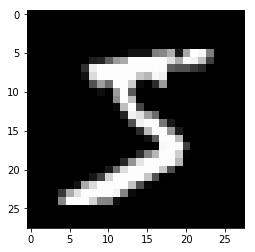

In [4]:
pyplot.imshow(train_data[0][0][0], cmap="gray");

In [126]:
valid_data = torchvision.datasets.MNIST('~/pytorch_data/', train=False, download=True,
    transform = torchvision.transforms.ToTensor())
valid_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: /Users/anton/pytorch_data/
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [127]:
valid_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [128]:
x_train = torch.stack([row[0].flatten() for row in train_data])
y_train = torch.stack([row[1] for row in train_data])
x_valid = torch.stack([row[0].flatten() for row in valid_data])
y_valid = torch.stack([row[1] for row in valid_data])

In [31]:
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000, 784])
tensor(0) tensor(9)


### Alternative way to load the data

In [184]:
from pathlib import Path
import requests
import pickle
import gzip

PATH = Path.home() / "temp_data"
PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train_alt, y_train_alt), (x_valid_alt, y_valid_alt), _) = pickle.load(f, encoding="latin-1")

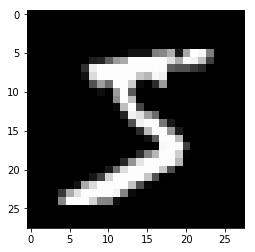

In [186]:
pyplot.imshow(x_train_alt[0].reshape(28, 28), cmap="gray");

### Simplest NN

In [67]:
weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()  # do not include weights init in gradient calculation
bias = torch.zeros(10, requires_grad=True)

Softmax is computed using formula:

\begin{equation*}
\sigma(x)_i = \frac{e^x_i}{\sum_{j=1}^K{e^x_j}}.
\end{equation*}

Log softmax is:

\begin{equation*}
\log(\sigma(x)_i) = \log(\frac{e^x_i}{\sum_{j=1}^K{e^x_j}})
                  = x_i - \log(\sum_{j=1}^K{e^x_j}).
\end{equation*}

In [68]:
def log_softmax(x):
    return x - x.exp().sum(dim=-1).log().unsqueeze(dim=-1) # unsqueeze(-1) wraps every element in 1D-tensor

def model(xb):
    return log_softmax(xb @ weights + bias)  # @ or .mm() is matrix multiplication, * or .mul() is element wise

### Do one forward pass

In [69]:
bs = 64  # batch size

xb = x_train[0:bs]  # a mini-batch from x
preds = model(xb)
print(preds[0], preds.shape)

tensor([-2.3526, -2.1480, -2.3676, -1.7700, -2.5409, -2.4346, -2.2329, -2.4099,
        -2.8930, -2.2515], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [87]:
# Computes negative log-likelihood
def nll(preds, target):
    # Get log softmax for the true number and then computes mean
    return -preds[range(target.shape[0]), target].mean()

loss_func = nll

In [88]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.3379, grad_fn=<NegBackward>)


In [89]:
# When largest value matches target value
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [90]:
print(accuracy(preds, yb))

tensor(0.1406)


### Run training loop

In [94]:
from IPython.core.debugger import set_trace

lr = 0.5     # learning rate
epochs = 2

for epoch in range(epochs):
    for i in range((x_train.shape[0] - 1) // bs + 1):   # a trick to get floor value
        # set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()           # update gradients of the model
        with torch.no_grad():     # do not record these actions for gradient
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()  # need to zero out, since .backwards() adds, not replaces gradients
            bias.grad.zero_()

In [95]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0456, grad_fn=<NegBackward>) tensor(1.)


### Use PyTorch activation and loss function

In [96]:
import torch.nn.functional as F

loss_func = F.cross_entropy # combines log_softmax & nll into a single function

def model(xb):
    return xb @ weights + bias

In [104]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(2.4307, grad_fn=<NllLossBackward>) tensor(0.0625)


### Use modules

* Modules behave like functions (can be called) and contain state (NN weights). It contains parameters.
* Parameters is a wrapper for tensor that tells module that it contains weights to update during backprop.

In [101]:
from torch import nn

class MyLogisticModule(nn.Module):
    def __init__(self):
        super().__init__()
        # When parameters are assigned as module attributes, they are added to its list of parameters.
        # They have requires_grad=True by default. Assigning tensors don't have same effect.
        self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb):
        return xb @ self.weights + self.bias

In [102]:
model = MyLogisticModule()

In [103]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(2.4307, grad_fn=<NllLossBackward>) tensor(0.0625)


In [105]:
def fit():
    for epoch in range(epochs):
        for i in range((x_train.shape[0] - 1) // bs + 1):
            start_i = i * bs
            end_i = start_i + bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            with torch.no_grad():
                # Instead of:
                # weights -= weights.grad * lr
                # bias -= bias.grad * lr
                for p in model.parameters():
                    p -= p.grad * lr

                # Instead of:
                # weights.grad.zero_()
                # bias.grad.zero_()
                model.zero_grad()

fit()

In [106]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0525, grad_fn=<NllLossBackward>) tensor(1.)


In [109]:
class MyLogisticModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lin(xb)

In [110]:
model = MyLogisticModule()
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

fit()
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(2.4079, grad_fn=<NllLossBackward>) tensor(0.0312)
tensor(0.0549, grad_fn=<NllLossBackward>) tensor(1.)


### Use optimization algorithms

In [116]:
from torch import optim

def get_model():
    model = MyLogisticModule()
    opt = optim.SGD(model.parameters(), lr=lr)
    return model, opt

model, opt = get_model()

def fit():
    for epoch in range(epochs):
        for i in range((x_train.shape[0] - 1) // bs + 1):
            start_i = i * bs
            end_i = start_i + bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            # Instead of:
            # with torch.no_grad():
            #     for p in model.parameters():
            #         p -= p.grad * lr
            #     model.zero_grad()
            opt.step()
            opt.zero_grad()

In [117]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

fit()
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(2.3538, grad_fn=<NllLossBackward>) tensor(0.0312)
tensor(0.0542, grad_fn=<NllLossBackward>) tensor(1.)


### Dataset and DataLoader

Dataset must implement `__len__` & `__getitem__` functions.

In [115]:
from torch.utils.data import TensorDataset # dataset wrapping tensors

train_ds = TensorDataset(x_train, y_train)

Now this code:
    
`xb = x_train[start_i:end_i]
yb = y_train[start_i:end_i]`

can be replaced with:

`xb,yb = train_ds[start_i:end_i]`

In [121]:
def fit():
    for epoch in range(epochs):
        for i in range((x_train.shape[0] - 1) // bs + 1):
            xb,yb = train_ds[i*bs : (i+1)*bs]
            
            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()

In [122]:
model, opt = get_model()
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

fit()
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(2.3220, grad_fn=<NllLossBackward>) tensor(0.2188)
tensor(0.0534, grad_fn=<NllLossBackward>) tensor(1.)


In [123]:
from torch.utils.data import DataLoader # data loader is responsible for managing batches

train_dl = DataLoader(train_ds, batch_size=bs)

In [124]:
def fit():
    for epoch in range(epochs):
        # Instead of:
        # for i in range((x_train.shape[0] - 1) // bs + 1):
        #     xb,yb = train_ds[i*bs : (i+1)*bs]
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()

In [125]:
model, opt = get_model()
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

fit()
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(2.3665, grad_fn=<NllLossBackward>) tensor(0.0312)
tensor(0.0532, grad_fn=<NllLossBackward>) tensor(1.)


In [133]:
# We want to shuffle train data to prevent correlation between batches and overfitting.
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

# No need to shuffle validation set + no need to backpropagate and store gradients,
# so we can increase batch size.
valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

Below we call `model.train()` before training and `model.eval()` before inference. This allows layers as `nn.BatchNorm2d` and `nn.Dropout` to choose required implementations.

In [134]:
def fit():
    for epoch in range(epochs):
        model.train() # train mode
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            opt.step()
            opt.zero_grad()
            
        model.eval()
        # Need to call it to deactivate autograd engine.
        # See: https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615
        with torch.no_grad():
            valid_loss = sum(loss_func(model(xb), yb) for xb, yb in valid_dl)

        print(epoch, valid_loss / len(valid_dl))

In [136]:
model, opt = get_model()
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

fit()
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(2.3380, grad_fn=<NllLossBackward>) tensor(0.1250)
0 tensor(0.3073)
1 tensor(0.2989)
tensor(0.1038, grad_fn=<NllLossBackward>) tensor(0.9688)


### Refactor our own code

In [138]:
# Reuse code to compute loss for a batch
def loss_batch(model, loss_func, xb, yb, opt=None):
    pred = model(xb)
    loss = loss_func(pred, yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    
    return loss.item(), len(xb)

In [139]:
# Use previous method in fit():
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(*[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl])
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)

In [140]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [142]:
# Now training code is just 3 lines:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.3306847516536713
1 0.282469957113266


### Use CNN

In [143]:
class MyCNNModule(nn.Module):
    def __init__(self):
        super().__init__()
        # https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d
        # Firt param: in_channels, second param: out_channels.
        self.conv1 = nn.Conv2d(1,  16, kernel_size=3, stride=2, padding=1)   # 14x14
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)   # 7x7
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)   # 4x4

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        # https://pytorch.org/docs/stable/nn.html#avg-pool2d
        # https://pytorch.org/docs/stable/nn.html#torch.nn.AvgPool2d
        xb = F.avg_pool2d(xb, 4) # 10x4x4 -> 10x1, taking average
        return xb.view(-1, xb.size(1)) # or .squeeze()        

In [144]:
model = MyCNNModule()
opt = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.34487660360336303
1 0.26236868824958803


In [145]:
model

MyCNNModule(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(16, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
)

In [146]:
class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, xb):
        return self.func(xb)

In [161]:
model = nn.Sequential(
    Lambda(lambda x: x.view(-1, 1, 28, 28)),
    nn.Conv2d(1,  16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AvgPool2d(4),  # 10x4x4 -> 10x1
    Lambda(lambda x: x.view(-1, x.size(1)))
)

In [162]:
model

Sequential(
  (0): Lambda()
  (1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (2): ReLU()
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (4): ReLU()
  (5): Conv2d(16, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (6): ReLU()
  (7): AvgPool2d(kernel_size=4, stride=4, padding=0)
  (8): Lambda()
)

In [163]:
opt = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.3140765489578247
1 0.2280651436328888


In [164]:
fit(10, model, loss_func, opt, train_dl, valid_dl)

0 0.213772429895401
1 0.1809079351425171
2 0.15519040870666503
3 0.16269604711532593
4 0.15102098331451416
5 0.14518123655319215
6 0.14870509514808655
7 0.14028265924453737
8 0.1407420620441437
9 0.1358901216506958


In [166]:
class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))

In [173]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)

# Move conversion of bs * 1 * 784 input to bs * 1 * 28 * 28 to data loader.
preprocess = lambda x, y: (x.view(-1, 1, 28, 28), y)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

In [202]:
def create_model():
    return nn.Sequential(
        # We moved conversion to data loader.
        nn.Conv2d(1,  16, kernel_size=3, stride=2, padding=1),
        nn.ReLU(),
        nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
        nn.ReLU(),
        nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
        nn.ReLU(),
        # https://pytorch.org/docs/stable/nn.html#adaptiveavgpool2d
        nn.AdaptiveAvgPool2d(1),  # 10x4x4 -> 10x1, it adaptive since we just specify required output
        Lambda(lambda x: x.view(-1, x.size(1)))
    )
    
model = create_model()

In [196]:
opt = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.3544738989830017
1 0.22324834032058716


### Use GPU (or backtrack to CPU)

In [176]:
print(torch.cuda.is_available())

False


In [177]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
dev

device(type='cpu')

In [180]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)

# Updated to move data to GPU when available.
preprocess = lambda x, y: (x.view(-1, 1, 28, 28).to(dev), y.to(dev))
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

In [182]:
# Move model to GPU as well. It modifies the model in-place.
model.to(dev)

opt = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.19373352193832397
1 0.15269651584625243


### Training curve

In [281]:
log_interval = 10 # Log every 10th batch

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    global train_counter, train_losses, valid_counter, valid_losses
    train_counter, train_losses = [], []
    valid_counter, valid_losses = [], []
    
    for epoch in range(epochs):
        model.train()
        for batch_idx, (xb, yb) in enumerate(train_dl):
            losses, nums = loss_batch(model, loss_func, xb, yb, opt)
            
            if batch_idx % log_interval == 0:
                train_counter.append(len(train_dl.dl.dataset) * epoch + batch_idx * bs + nums)
                train_losses.append(np.mean(losses))

        model.eval()
        with torch.no_grad():
            losses, nums = zip(*[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl])
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        valid_counter.append(len(train_dl.dl.dataset) * (epoch + 1))
        valid_losses.append(val_loss)
        
        print(epoch, val_loss)

In [282]:
model = create_model()
opt = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.35144877829551696
1 0.25046769790649415


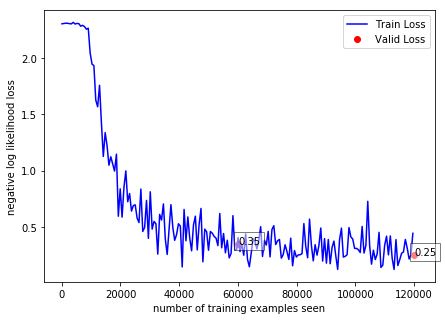

In [283]:
def show_training_curve(figsize):
    fig = plt.figure(figsize = figsize)
    plt.plot(train_counter, train_losses, color='blue')
    plt.scatter(valid_counter, valid_losses, color='red')
    plt.legend(['Train Loss', 'Valid Loss'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel('negative log likelihood loss')

    for count, loss in zip(valid_counter, valid_losses):
        t = plt.annotate("{:.2f}".format(loss), xy=(count, loss))
        t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
        
show_training_curve((7,5))

### Persisting model & optimizer

Details: https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [284]:
PATH = Path.home() / "temp_data"

MODEL_PATH = (PATH / "mnist_model.pth").as_posix()
OPT_PATH = (PATH / "mnist_optimizer.pth").as_posix()

torch.save(model.state_dict(), MODEL_PATH)
torch.save(opt.state_dict(), OPT_PATH)

In [285]:
model = create_model()
opt = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

model_state = torch.load(MODEL_PATH)
model.load_state_dict(model_state)

opt_state = torch.load(OPT_PATH)
opt.load_state_dict(opt_state)

In [286]:
example_data, example_targets = next(enumerate(train_dl))[1]

model.eval() # Must set to evaluation mode before inference.
with torch.no_grad():
    example_output = model(example_data)

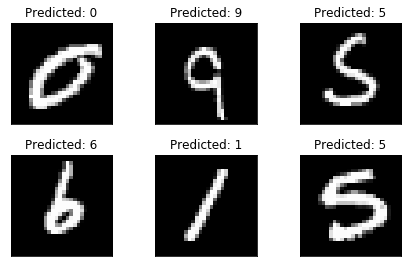

In [287]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    # .max() below returns max values and corresponding indices
    plt.title("Predicted: {}".format(example_output.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])

In [288]:
fit(10, model, loss_func, opt, train_dl, valid_dl)

0 0.1958939091205597
1 0.16214265356063842
2 0.17641934208869933
3 0.17180473499298096
4 0.15043965082168578
5 0.14184796776771547
6 0.13384541854858398
7 0.13057860097885132
8 0.13396672019958497
9 0.12214728441238404


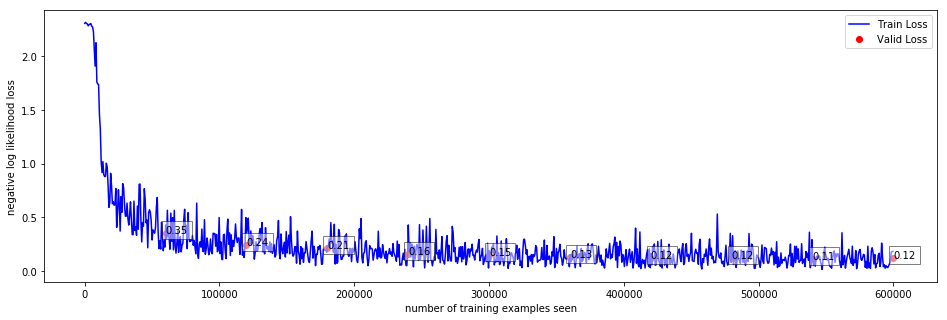

In [277]:
show_training_curve((16,5))